<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tarea1_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1
Efectúe un profundo análisis exploratorio del dataset, incluyendo un estudio de 
correlación entre las variables del mismo. Explique detalladamente los métodos 
utilizados. Para obtener una representación gráfica de la correlación entre variables, se 
recomienda utilizar el método heatmap del paquete Seaborn [3]. Discuta 
detalladamente los resultados obtenidos.


In [2]:
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
wine_df = pd.read_csv('winequality-red.csv')

In [79]:
features = wine_df.columns[0:-1]
wine_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


(fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 dtype: object, count    1599.000000
 mean        5.636023
 std         0.807569
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         8.000000
 Name: quality, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x7fd932ea6d50>, Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'))

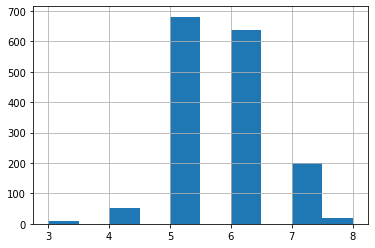

In [80]:
wine_df.dtypes, wine_df['quality'].describe(),  wine_df['quality'].hist(), features

<Figure size 1440x1440 with 0 Axes>

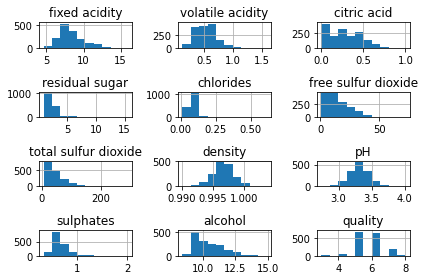

In [9]:
plt.figure(figsize=(20,20))
wine_df.hist()
plt.tight_layout()
plt.show()

In [60]:
correlations = wine_df.corr(method='pearson')
correlations
# ('alcohol', 0.47616632400114156),  --> density
#  ('volatile acidity', -0.3905577802640094),  --> citric acid
#  ('sulphates', 0.25139707906926206),
#  ('citric acid', 0.2263725143180432),
#  ('total sulfur dioxide', -0.18510028892653843),
#  ('density', -0.1749192277833492),

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


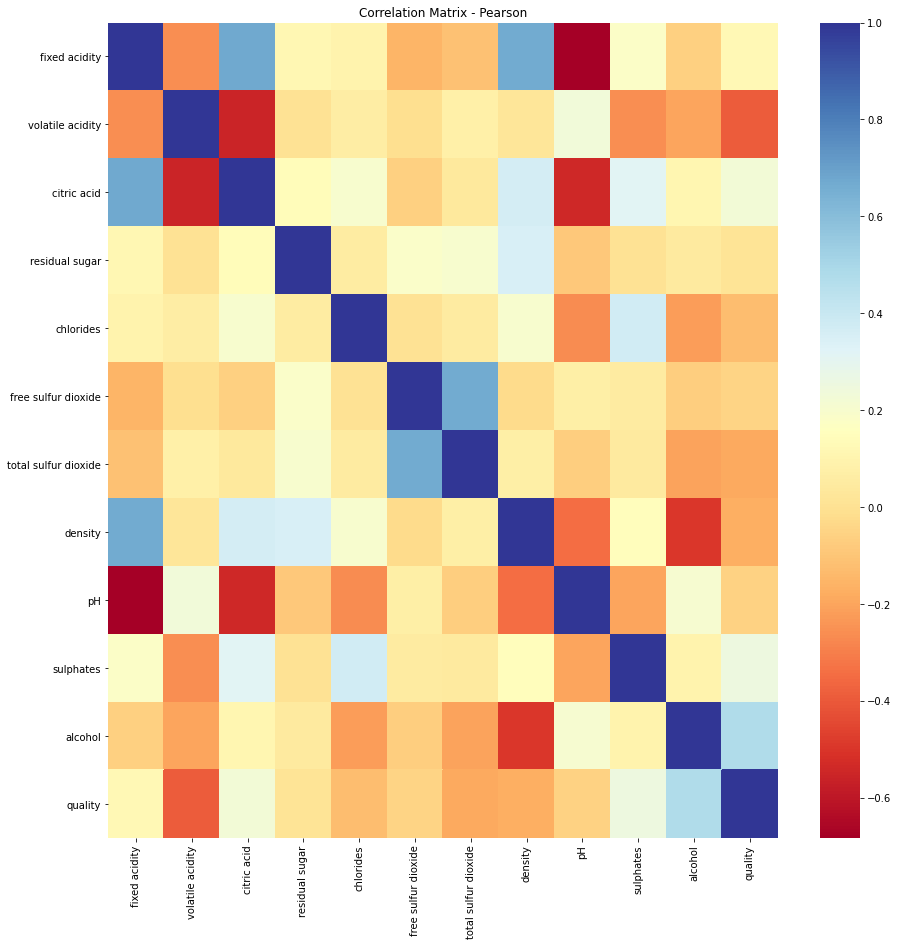

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(correlations, cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

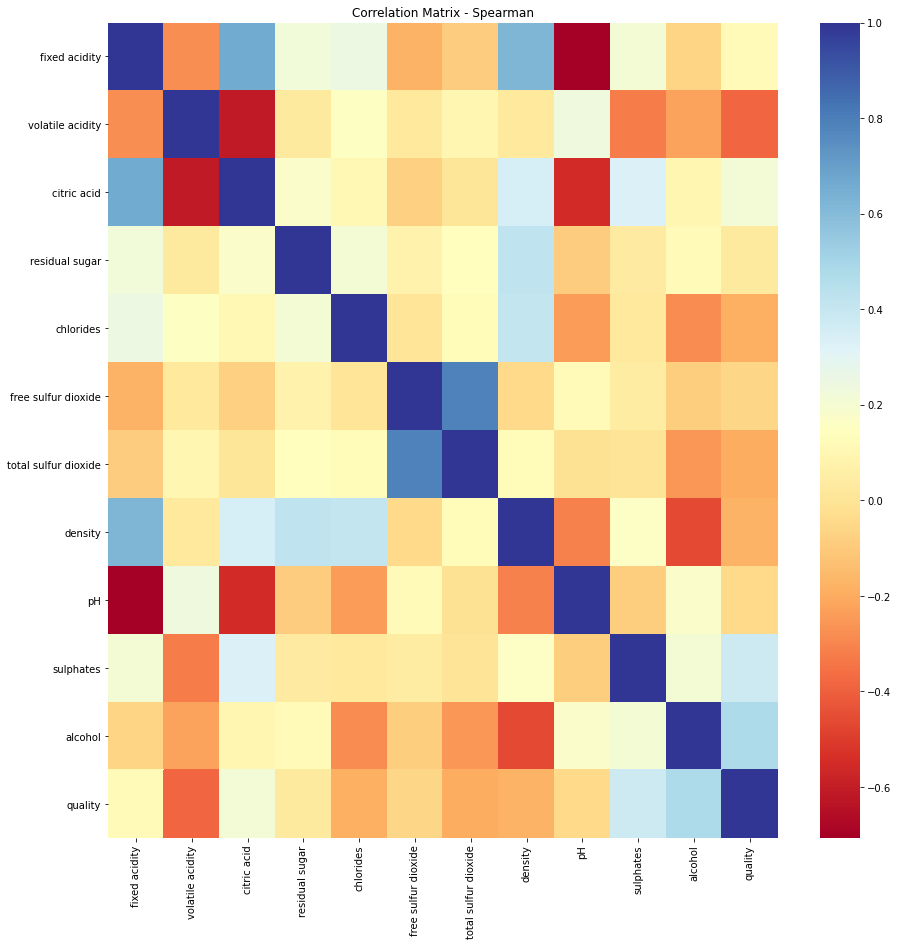

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(wine_df.corr(method='spearman'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()


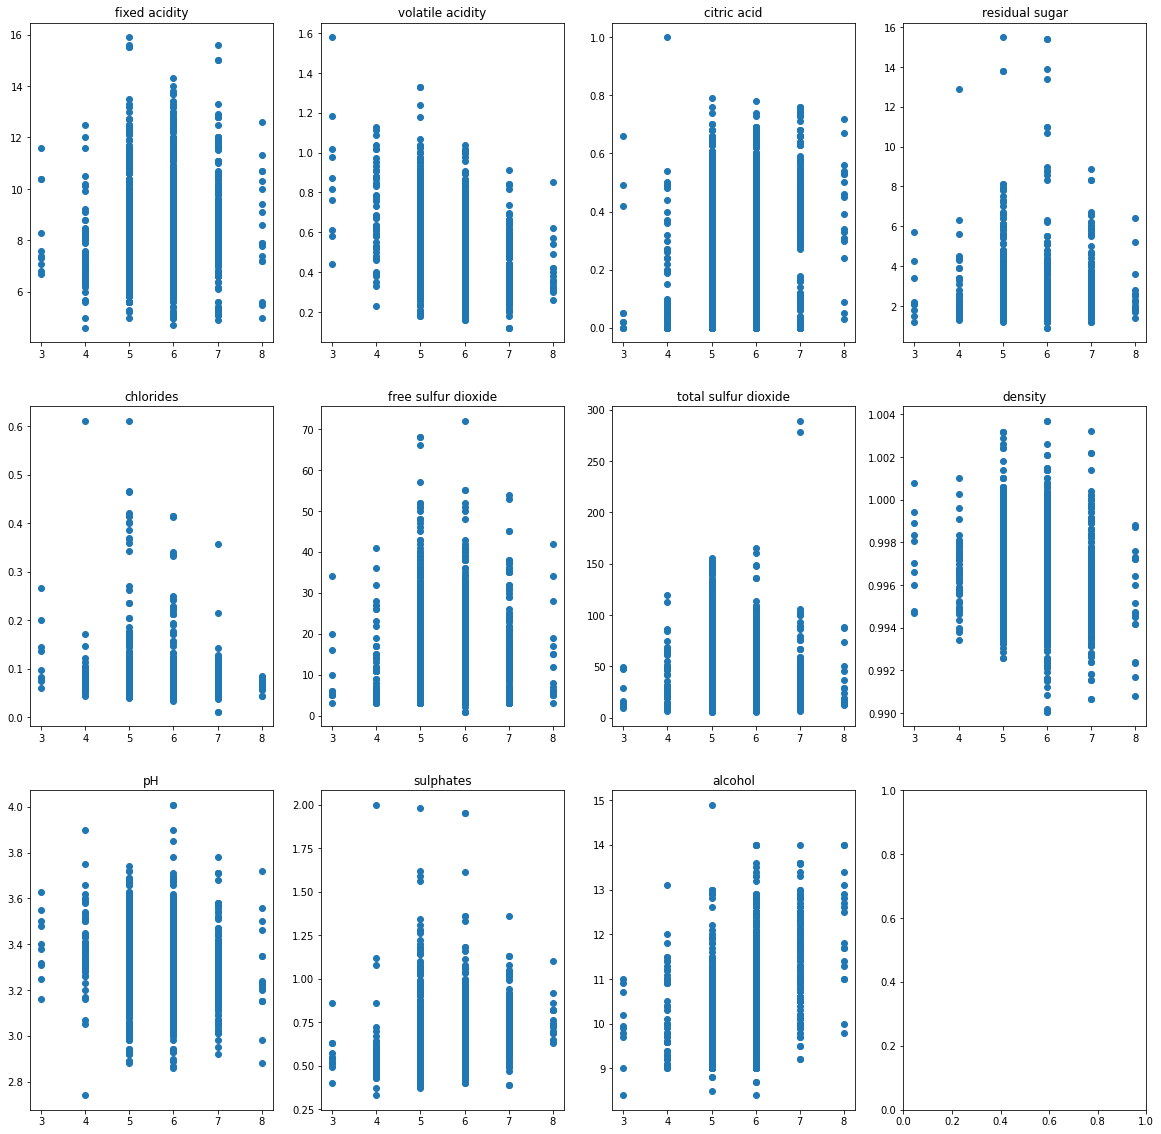

In [14]:
features = wine_df.columns[0:-1]
label = wine_df['quality']
f, ax = plt.subplots(3,4, figsize=(20,20))
i = 0
for j in range(3):
  for a in ax[j]:
    if i < 11:
      a.scatter(label, wine_df[features[i]])
      a.set_title(features[i])
      i += 1


In [15]:
corr_ord = sorted([(i,coef) for i, coef in zip(correlations.index, correlations['quality'])], key= lambda x : abs(x[1]), reverse=True)
corr_ord

[('quality', 1.0),
 ('alcohol', 0.47616632400114156),
 ('volatile acidity', -0.3905577802640094),
 ('sulphates', 0.25139707906926206),
 ('citric acid', 0.2263725143180432),
 ('total sulfur dioxide', -0.18510028892653843),
 ('density', -0.1749192277833492),
 ('chlorides', -0.12890655993005315),
 ('fixed acidity', 0.1240516491132247),
 ('pH', -0.0577313912053823),
 ('free sulfur dioxide', -0.05065605724427643),
 ('residual sugar', 0.013731637340066346)]

#Parte 2
Partiendo de los atributos de características del vino utilice el método de regresión 
lineal para predecir la calidad del mismo. Analice los resultados obtenidos. Revise y 
discuta si existen mecanismos para mejorar las métricas que arroja este modelo.

In [48]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

sample = 0.8
n_features = 5



def get_X_Y(sample, n_features, df, corr_ord):
  df_train, df_test = train_test_split(df, test_size=1-sample)

  X_train = df_train[[i[0] for i in corr_ord[1:n_features]]]
  X_test = df_test[[i[0] for i in corr_ord[1:n_features]]]
  Y_train = df_train['quality']
  Y_test = df_test['quality']

  return X_train, X_test, Y_train, Y_test


In [62]:
def my_linear_model(X_train, X_test, Y_train, Y_test):
  regr = linear_model.LinearRegression()


  regr.fit(X_train, Y_train)


  Y_pred = regr.predict(X_test)

  mse = mean_squared_error(Y_test, Y_pred)
  r2 = r2_score(Y_test, Y_pred)
  mae =  mean_absolute_error(Y_test, Y_pred)

  # print('MSE: %.2f' % mse)
  # print('R2: %.2f' % r2)
  # print('MAE: %.2f' % mae)
  
  return Y_pred, mse, r2, mae

In [55]:
sample = 0.8
for i in range(2,len(corr_ord)):
  X_train, X_test, Y_train, Y_test = get_X_Y(sample, i, wine_df, corr_ord)
  Y_pred, mse, r2, mae = my_linear_model(X_train, X_test, Y_train, Y_test)
  print(i,mse,r2,mae)

2 0.4407641518725671 0.2822047241248927 0.5478124342228472
3 0.4555606192167504 0.38460493631213066 0.5348015193332591
4 0.45635258095939213 0.3325739218144175 0.5288526947074753
5 0.4481207845465208 0.35753292538133197 0.5227755025045067
6 0.4002624598783255 0.4167312847185819 0.49278193213114474
7 0.43296223459513855 0.369439592346259 0.5147547393170451
8 0.4550793876003535 0.34974144214283054 0.5121408537576743
9 0.4137644143589053 0.3558520428370241 0.5040906700208972
10 0.36359725084992556 0.405907700738262 0.47481630682102016
11 0.43417995530231746 0.35143138068070023 0.5107929154987159


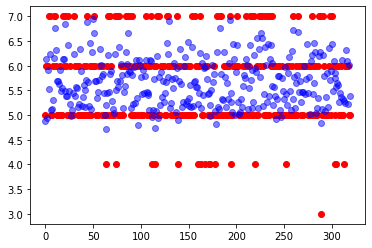

In [56]:
X_train, X_test, Y_train, Y_test = get_X_Y(sample, 6, wine_df, corr_ord)
Y_pred, mse, r2, mae = my_linear_model(X_train, X_test, Y_train, Y_test)
plt.scatter([i for i in range(len(Y_test))], Y_test,c='r')
plt.scatter([i for i in range(len(Y_test))], Y_pred,c='b', alpha=0.5)

MSE: 0.48
R2: 0.31
MAE: 0.44


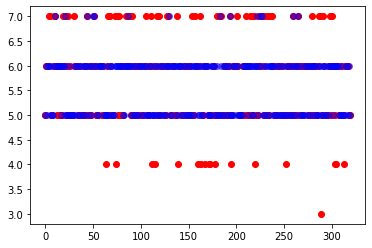

In [58]:
import math
Y_pred_adapted = [math.floor(i) if abs(math.floor(i)-i) <= 0.5 else math.ceil(i) for i in Y_pred]
print('MSE: %.2f' % mean_squared_error(Y_test, Y_pred_adapted))
print('R2: %.2f' % r2_score(Y_test, Y_pred_adapted))
print('MAE: %.2f' % mean_absolute_error(Y_test, Y_pred_adapted))

plt.scatter([i for i in range(len(Y_test))], Y_test,c='r')
plt.scatter([i for i in range(len(Y_test))], Y_pred_adapted,c='b', alpha=0.5)

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

X_train, X_test, Y_train, Y_test = get_X_Y(sample, len(corr_ord), wine_df, corr_ord)

pipe = Pipeline([('fselector', SelectKBest(chi2, k=6)), ('l_reg', linear_model.LinearRegression())])
pipe.fit(X_train, Y_train)
Y_pred = pipe.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae =  mean_absolute_error(Y_test, Y_pred)

print('MSE: %.2f' % mse)
print('R2: %.2f' % r2)
print('MAE: %.2f' % mae)


MSE: 0.44
R2: 0.29
MAE: 0.50


# Parte 3
Utilizando los métodos de clasificación vistos en el curso, se pretende encontrar el mejor modelo que permita predecir, a partir de las características disponibles en el dataset [1], la calidad del vino. La variable de calidad debe de convertirse a una clase de 2 valores: bueno y malo,. Será parte del problema definir el umbral de corte para determinar esta clase, partiendo de las categorías definidas en [1].
Utilizando los métodos y métricas vistas en el curso, compare los resultados obtenidos. Para todos los métodos utilizados, estudie la relevancia de cada uno de los atributos o features.
Para cada uno de los modelos utilizados, detalle los hiperparámetros aplicados.



(count    1599.000000
 mean        5.636023
 std         0.807569
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         8.000000
 Name: quality, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd932f2ffd0>)

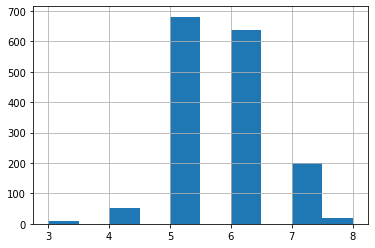

In [81]:
wine_df['quality'].describe(),  wine_df['quality'].hist()

In [82]:
def set_label(df, umbral, label_name, rank_name):

  df[label_name] = [1 if q>=umbral else 0 for q in df[rank_name]]
  return df

In [83]:
wine_df = set_label(wine_df, 6, 'q_label', 'quality')
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,q_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [98]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

def get_scores(Y_pred, probs, Y_test):

  # Calcular TP, TN, FP, FN
  # Armar matriz de cofusion

  # Recall, Precision, Accuracy, F1

  # AUC

  # probas = model.predict_proba(X_test)
  fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])

  plt.plot([0,1],[0,1],'k--') #se grafica la linea diagonal
  plt.plot(fpr, tpr, label='NB') #se grafica la curva ROC
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title('Curva ROC para Naive Bayes')
  plt.show()



  accuracy = accuracy_score(Y_test, Y_pred)
  print (classification_report(Y_test,Y_pred))
  
  
  mat = confusion_matrix(Y_test, Y_pred)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
  plt.xlabel('Clase de test')
  plt.ylabel('Clase de la predicción');

In [111]:
sample = 0.8
df_train, df_test = train_test_split(wine_df, train_size=sample)

X_train = df_train[features]
X_test = df_test[features]
Y_train = df_train['q_label']
Y_test = df_test['q_label']

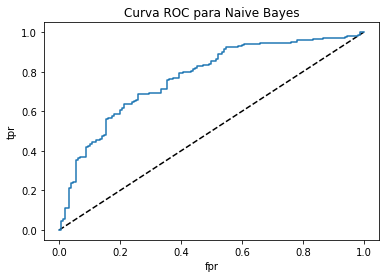

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       150
           1       0.75      0.68      0.71       170

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



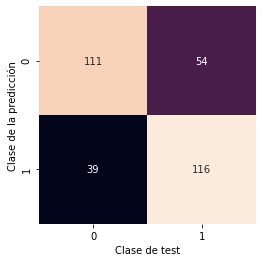

In [135]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
# model.fit(X_train, Y_train);


pipe = Pipeline([('fselector', SelectKBest(chi2, k=10)), ('gnb', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

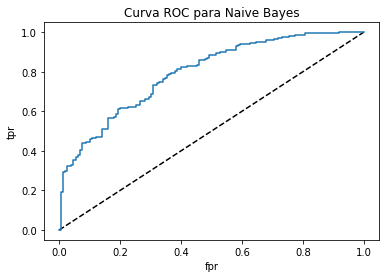

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       150
           1       0.73      0.73      0.73       170

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



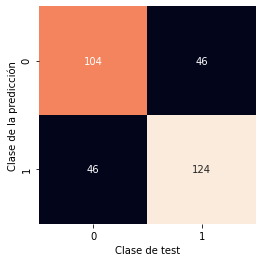

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='lbfgs')
# model.fit(X_train, Y_train);


pipe = Pipeline([('fselector', SelectKBest(chi2, k=10)), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)
umbral_prob = 0.5
Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
get_scores(Y_pred, new_Y_pewd, Y_test)

In [160]:
model = GaussianNB()
pipe = Pipeline([('gnb', model)])
# model.fit(X_train, Y_train);
f_importance = []
for i in range(len(features)):
  n_f = list(X_train.columns)
  n_f.pop(i)
  X_train_n = X_train[n_f]
  X_test_n = X_test[n_f]
  
  pipe.fit(X_train_n, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test_n)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  accuracy = accuracy_score(Y_test, Y_pred)

  f_importance += [(features[i], accuracy)]

sorted(f_importance, key=lambda x:x[1], reverse=True)

[('residual sugar', 0.709375),
 ('pH', 0.703125),
 ('fixed acidity', 0.7),
 ('free sulfur dioxide', 0.7),
 ('total sulfur dioxide', 0.7),
 ('sulphates', 0.7),
 ('volatile acidity', 0.696875),
 ('citric acid', 0.696875),
 ('density', 0.6875),
 ('chlorides', 0.68125),
 ('alcohol', 0.675)]

In [157]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
pipe = Pipeline([('lr', model)])
# model.fit(X_train, Y_train);
f_importance = []
for i in range(len(features)):
  n_f = list(X_train.columns)
  n_f.pop(i)
  X_train_n = X_train[n_f]
  X_test_n = X_test[n_f]
  
  pipe.fit(X_train_n, Y_train)
  new_Y_pewd = pipe.predict_proba(X_test_n)

  # new_Y_pewd = model.predict_proba(X_test)
  umbral_prob = 0.5
  Y_pred = [0 if p>umbral_prob else 1 for p in new_Y_pewd[:,0]]
  accuracy = accuracy_score(Y_test, Y_pred)

  f_importance += [(features[i], accuracy)]

sorted(f_importance, key=lambda x:x[1], reverse=True)

[('residual sugar', 0.7125),
 ('fixed acidity', 0.709375),
 ('chlorides', 0.709375),
 ('pH', 0.709375),
 ('sulphates', 0.709375),
 ('citric acid', 0.70625),
 ('density', 0.70625),
 ('free sulfur dioxide', 0.703125),
 ('volatile acidity', 0.7),
 ('alcohol', 0.696875),
 ('total sulfur dioxide', 0.69375)]